In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import pickle

with open('../BIGCON_DATA_ver1.2/CJ_DATA.bin', 'rb') as f:
    cj_data = pickle.load(f) 

In [5]:
print(cj_data.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])


### 네이버 데이터

In [15]:
import os
path_dir = './dataset/week/'
file_list = os.listdir(path_dir)
file_list

['가구인테리어_2019_wk.xlsx',
 '가구인테리어_2020_wk.xlsx',
 '도서음반_2019_wk.xlsx',
 '도서음반_2020_wk.xlsx',
 '디지털가전_2019_wk.xlsx',
 '디지털가전_2020_wk.xlsx',
 '생활건강_2019_wk.xlsx',
 '생활건강_2020_wk.xlsx',
 '스포츠레저_2019_wk.xlsx',
 '스포츠레저_2020_wk.xlsx',
 '식품_2019_wk.xlsx',
 '식품_2020_wk.xlsx',
 '출산육아_2019_wk.xlsx',
 '출산육아_2020_wk.xlsx',
 '패션의류_2019_wk.xlsx',
 '패션의류_2020_wk.xlsx',
 '패션잡화_2019_wk.xlsx',
 '패션잡화_2020_wk.xlsx',
 '화장품미용_2019_wk.xlsx',
 '화장품미용_2020_wk.xlsx']

### CJ데이터

In [16]:
# CJ 데이터 
cj = cj_data['CJ_DATA']

# total_code 딕셔너리를 DataFrame로 변환
item_df = pd.DataFrame(cj_data['ITEM_CODE_DICT'].items(), columns=['ITEM_CODE', 'ITEM_NM'])
item_df['ITEM_NM'] = item_df['ITEM_NM'].str.replace('/', '')

# 대구 DataFrame와 item_df DataFrame 병합
cj = pd.merge(cj, item_df, on="ITEM_CODE")

### CJ 데이터 형식 맞추기

In [17]:
# 제공받은 데이터 네이버 데이터와 같은 형식으로 만들기
def year_data(data,item ,flag):
    if flag: # 2019
        data = data.query("(YEAR==2019) and (ITEM_NM==@item)")
    else:    # 2020
        data = data.query("(YEAR==2020) and (ITEM_NM==@item)")
    data.set_index(data['DATE'],inplace=True)
    data = data['TRANSIT_COUNT'].resample('W').sum()
    if flag: # 2019
        data = data[1:-1]
    else:    # 2020
        data = data[1:]
    data = data.rename_axis('DATE').reset_index()
    
    return data

### 스케일 조정

In [18]:
def scale(concat_df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    concat_df.iloc[:,1] = scaler.fit_transform(np.array(concat_df.iloc[:,1]).reshape(-1,1))
    concat_df.iloc[:,2] = scaler.fit_transform(np.array(concat_df.iloc[:,2]).reshape(-1,1))
    
    return concat_df

### 그래프 그리기

In [19]:
def draw_graph(graph_19, graph_20):
    fig = plt.figure(figsize = (50, 35))
    j=0
    for i in range(1, 21):

        if i %2 != 0:
            ax1 = fig.add_subplot(10, 2, i)
            x = graph_19[j].iloc[:,0]
            y1 = graph_19[j].iloc[:,1]
            y2 = graph_19[j].iloc[:,2]
            ax1.plot(x, y1, x, y2)
            plt.grid(axis='x')
            plt.legend(['naver', 'cj'])
            plt.title('2019 '+graph_19[j].columns[1])
        else:
            ax2 = fig.add_subplot(10, 2, i)
            x = graph_20[j].iloc[:,0]
            y1 = graph_20[j].iloc[:,1]
            y2 = graph_20[j].iloc[:,2]
            ax2.plot(x, y1, x, y2)
            plt.grid(axis='x')
            plt.legend(['naver', 'cj'])
            plt.title('2020 '+graph_20[j].columns[1])

        if i %2 == 0:
            j+=1

    plt.show()

### 상관관계

In [20]:
def corr(graph_19, graph_20):
    fig, axes = plt.subplots(ncols=2, nrows=10, figsize = (30, 30))
    j = 0
    for i, ax in zip(range(1, 21),axes.flatten()):
        plt.figure(figsize=(5,5))
        if i %2 != 0:
            sns.heatmap(data = graph_19[j].corr(), annot=True, square=True, fmt = '.2f', linewidths=1, cmap='Blues', ax=ax)
        else:
            sns.heatmap(data = graph_20[j].corr(), annot=True, square=True, fmt = '.2f', linewidths=1, cmap='summer', ax=ax)
        if i %2 == 0:
                j+=1
    plt.show()    

### main(주간)

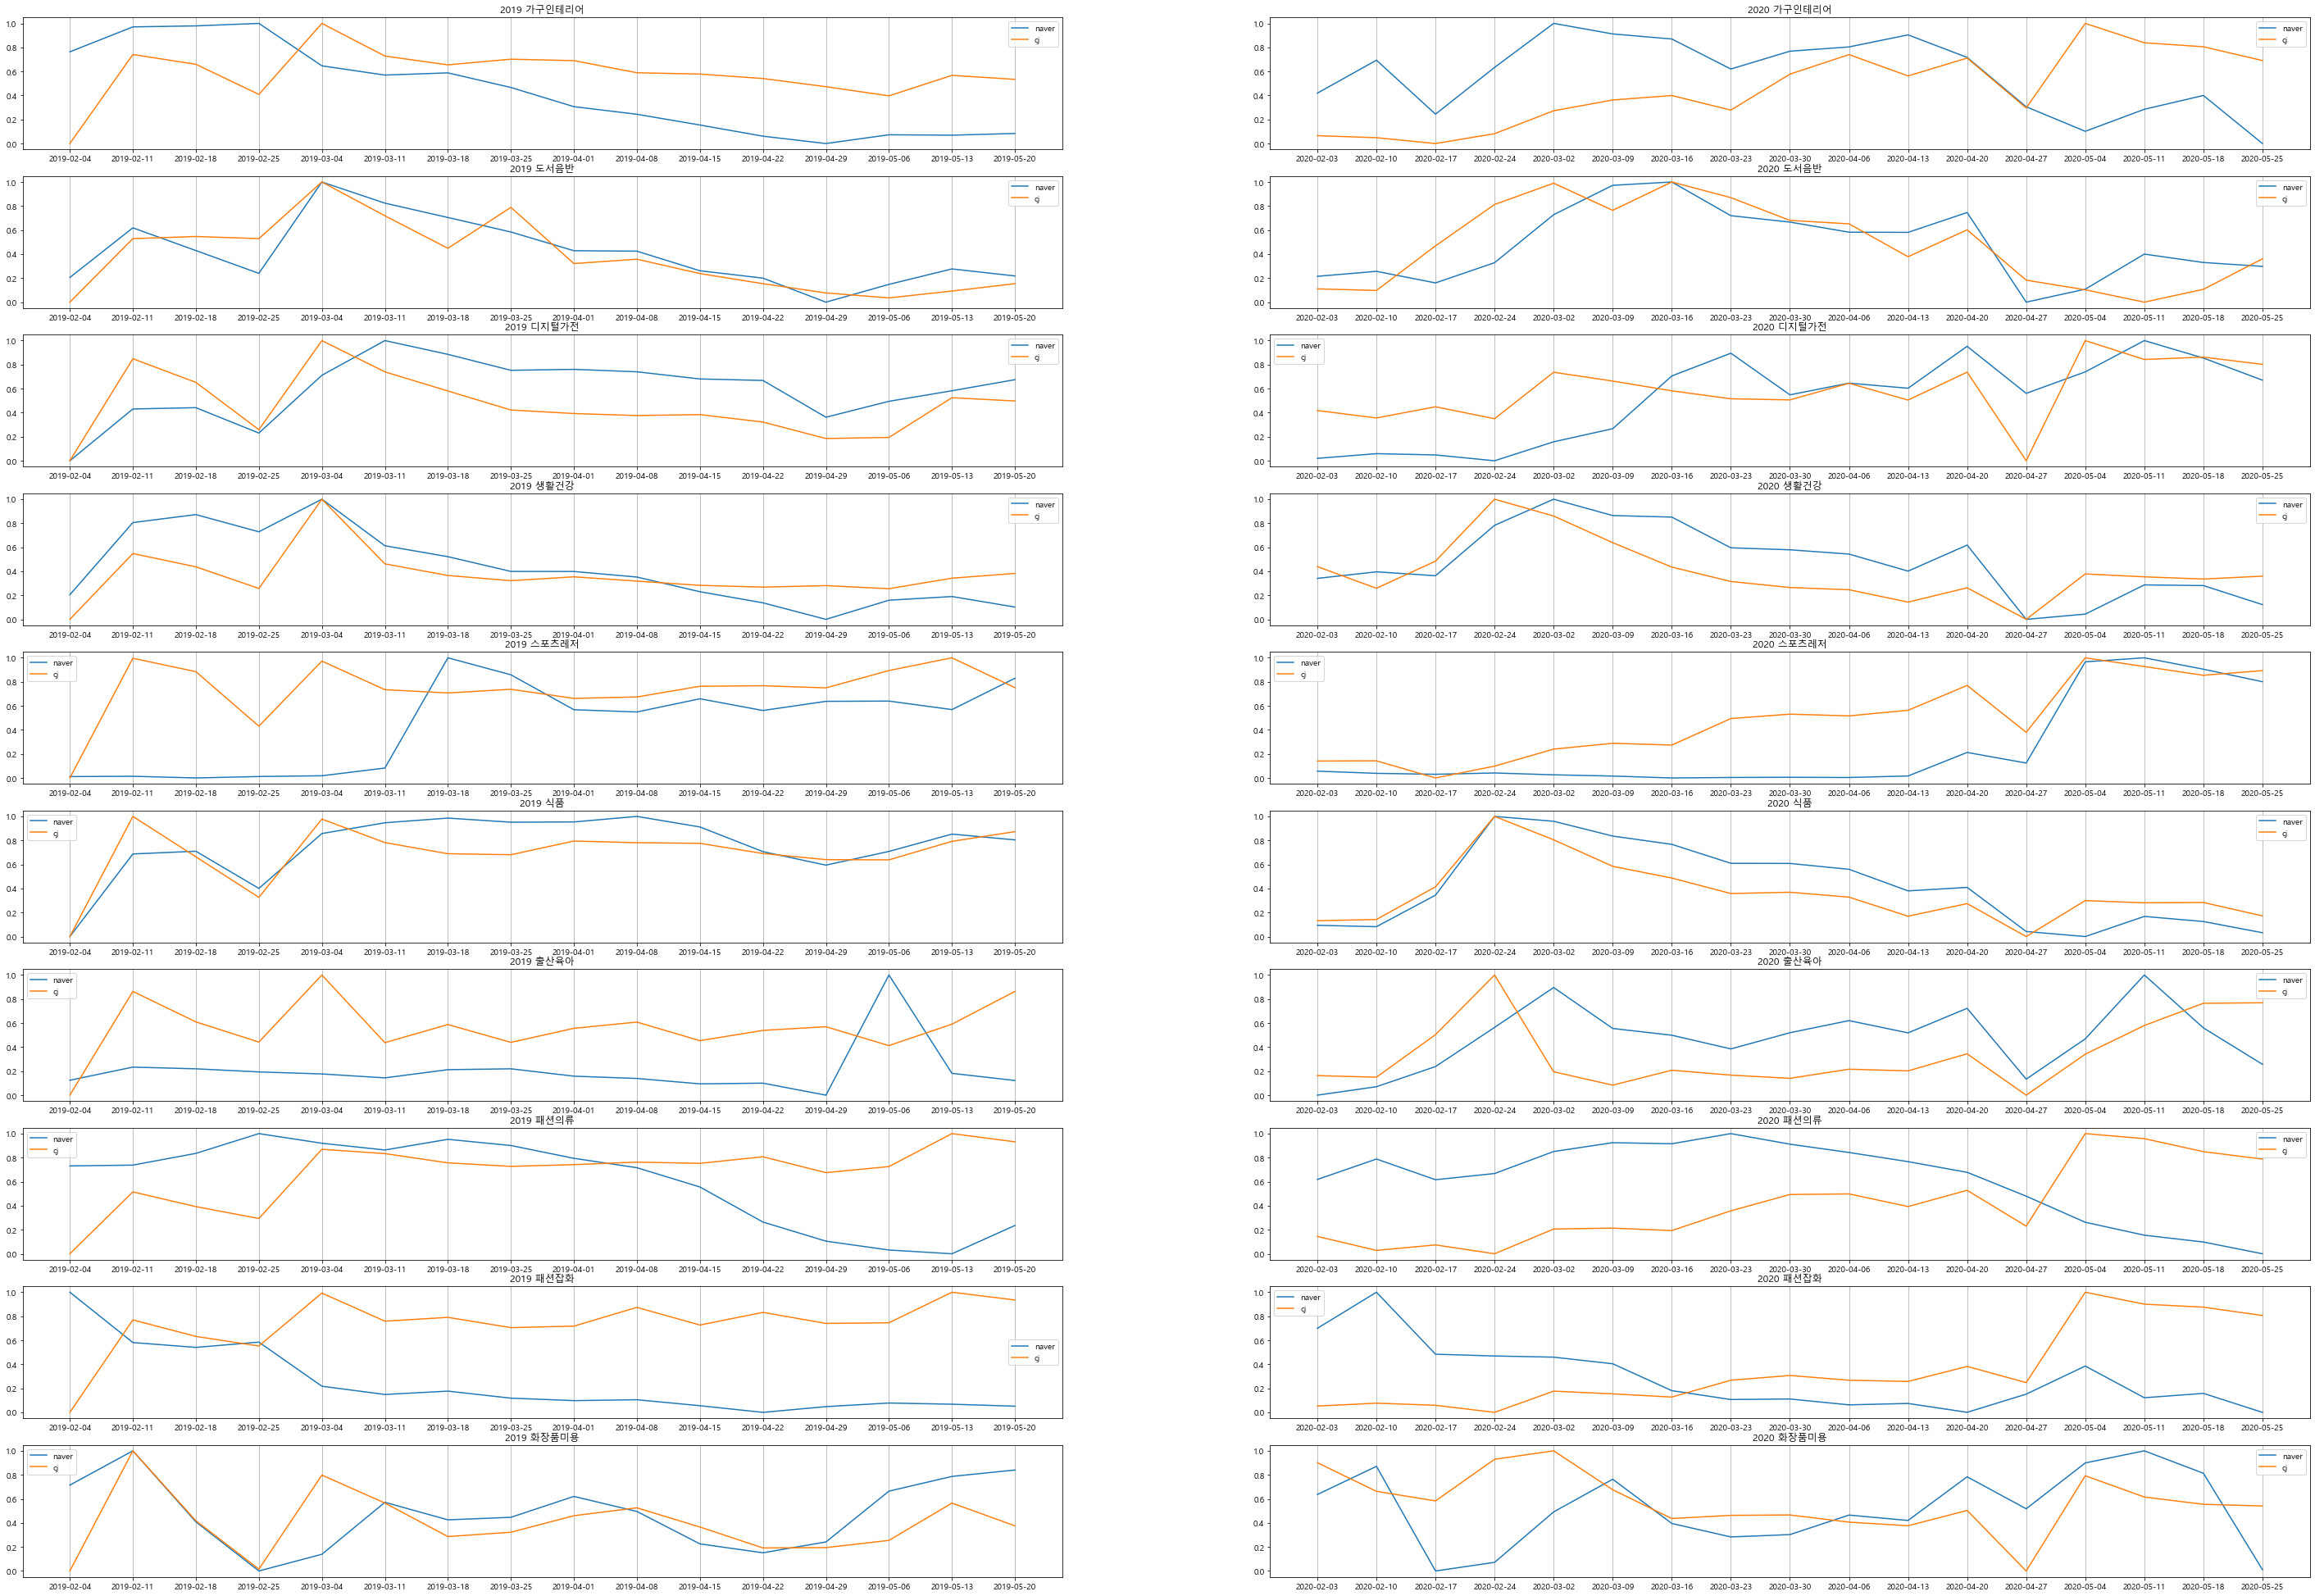

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


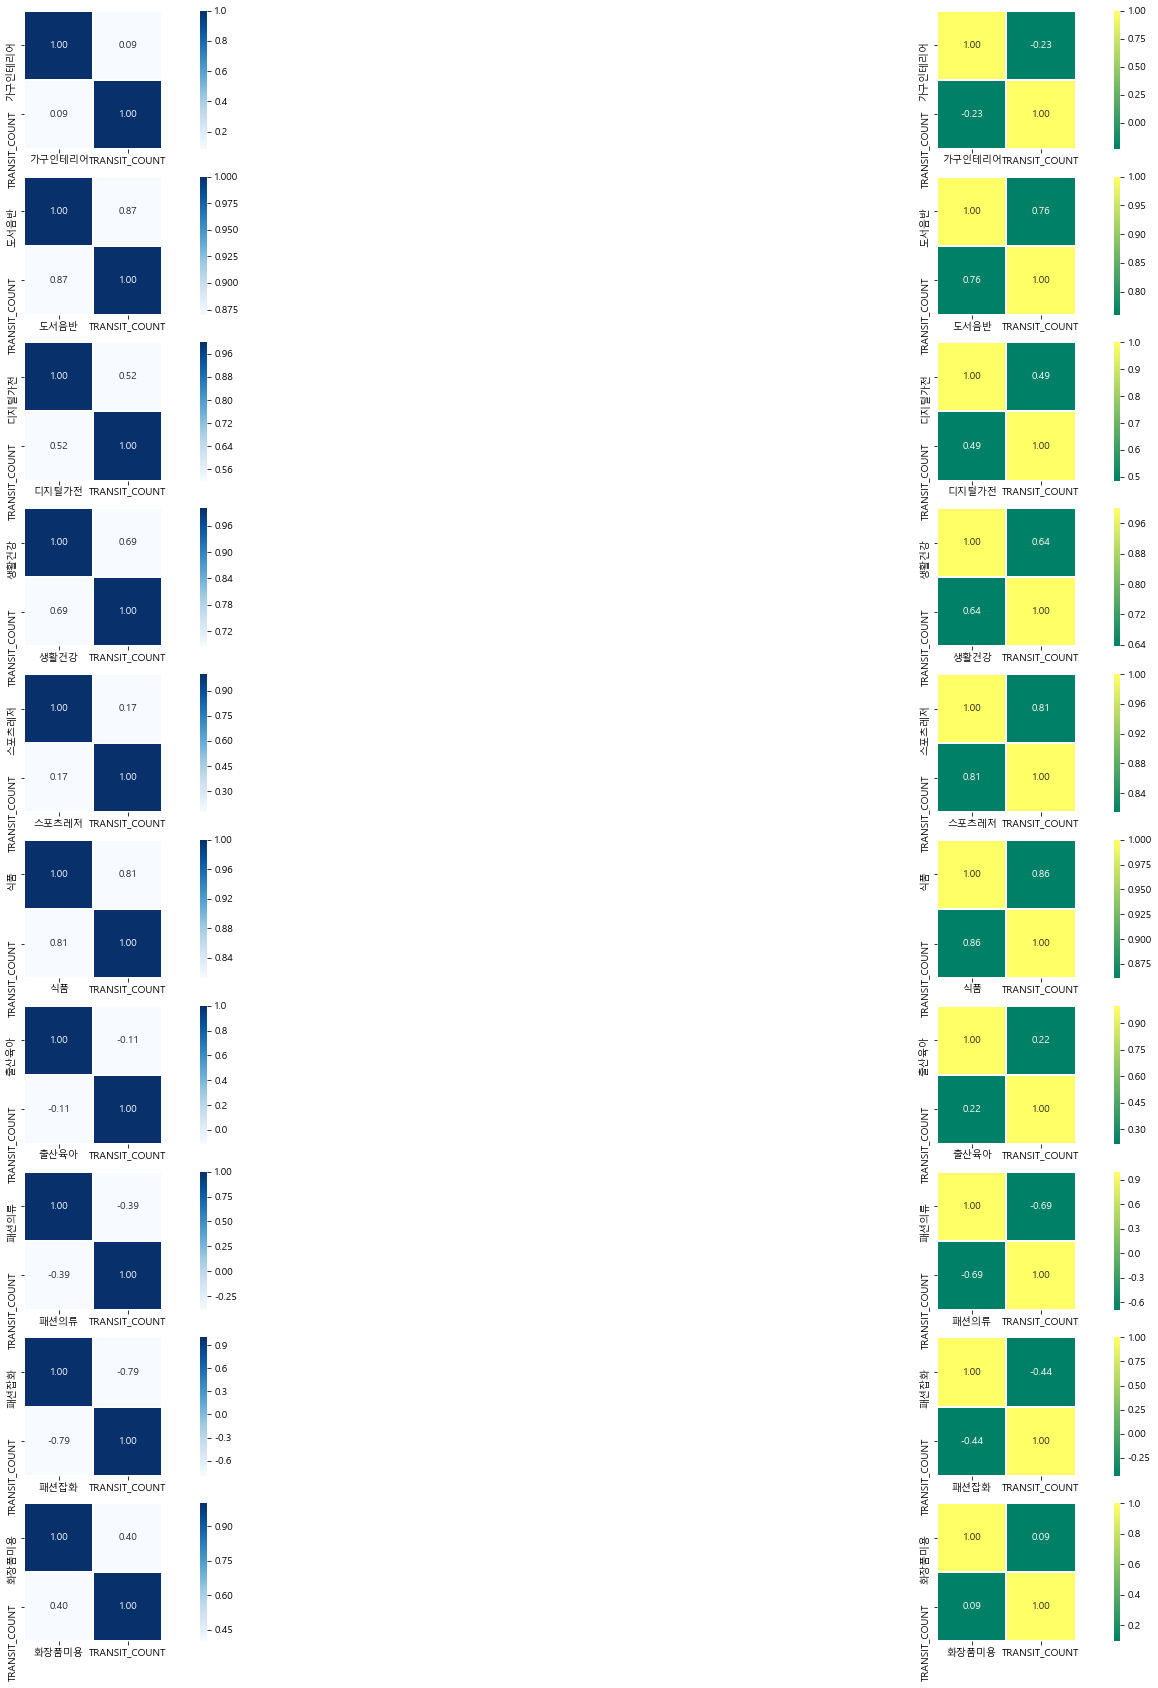

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [21]:
# main
graph_19, graph_20 = [], []
for file in file_list:
    file_split = file.split('_')

    if file_split[1] == '2019':
        naver_19 = pd.read_excel('./dataset/'+file, names = ['Date', file_split[0]], header = 6)
        data_19 = year_data(cj,file_split[0], flag=True)
        concat_19 = pd.concat([naver_19, data_19.iloc[:, 1]], axis=1)
        scale_19 = scale(concat_19)
        graph_19.append(scale_19)

    else:
        naver_20 = pd.read_excel('./dataset/'+file, names = ['Date', file_split[0]], header = 6)
        data_20 = year_data(cj,file_split[0], flag=False)
        concat_20 = pd.concat([naver_20, data_20.iloc[:, 1]], axis=1)
        scale_20 = scale(concat_20)
        graph_20.append(scale_20)
        
draw_graph(graph_19, graph_20)
corr(graph_19, graph_20)